In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from scipy.stats import * #chi2_contingency로 카이제곱통계량계산
from scipy.stats import norm

import keyword
import random

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math

import tensorflow as tf

import qgrid

In [2]:
# 두 집단간 차이 검정
# ln9

In [3]:
df=pd.read_csv('c:/temp/household_2020a.csv')
df.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3


In [4]:
# 가구주 성별간 소득차이
# number: 가구원 수
# 성별간이니까 지금 필요한건 가구원이 하나인 사람들

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       18064 non-null  int64 
 1   metro      18064 non-null  object
 2   id         18064 non-null  int64 
 3   sex        18064 non-null  int64 
 4   age        18064 non-null  int64 
 5   number     18064 non-null  int64 
 6   education  18064 non-null  int64 
 7   marriage   18064 non-null  int64 
 8   asset      18064 non-null  int64 
 9   debt       18064 non-null  int64 
 10  income     18064 non-null  int64 
 11  income_d   18064 non-null  int64 
 12  industry   13214 non-null  object
 13  job        13214 non-null  object
 14  house      18064 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 2.1+ MB


In [6]:
# number=1만 선택하자
df1=df.loc[df['number'].isin([1])] # df의 number라는 변수가 1과 같은 것만 가져오기
df1.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3
6,2020,G2,10000222,1,52,1,4,1,7930,8000,2808,2443,C,9,1
15,2020,G1,10000342,1,28,1,7,1,20050,200,5603,4782,C,3,2
16,2020,G1,10000352,2,65,1,4,3,25700,0,2947,2721,NaN,NaN,1


In [8]:
df1['number'].mean()

1.0

In [9]:
# 1인 가구 중에 30대만 선택해보자 ( age 변수 이용 )
df2=df1.loc[(df1['age']>=30)&(df1['age']<=39)]
df2.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
19,2020,G1,10001102,1,35,1,5,1,5252,0,1089,1033,L,5,2
134,2020,G2,11800271,2,30,1,6,1,17920,5000,3756,3032,O,4,2
157,2020,G1,12000102,1,30,1,6,1,540,0,2004,1812,G,5,3
190,2020,G1,12600311,1,36,1,6,1,1500,6280,5802,3959,C,2,3
191,2020,G1,12600321,2,31,1,6,1,1610,0,3032,1197,J,2,5


In [10]:
df2.describe()

,year,id,sex,age,number,education,marriage,asset,debt,income,income_d,house
count,388.0,3.880000e+02,388.000000,388.000000,388.0,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,2020.0,4.799861e+08,1.373711,34.471649,1.0,5.363402,1.198454,14466.365979,3720.824742,3589.876289,2938.038660,2.574742
std,0.0,2.995366e+08,0.484413,2.887507,0.0,1.008696,0.743132,16607.456223,6679.132947,2318.505170,1903.050082,1.042795
min,2020.0,1.000110e+07,1.000000,30.000000,1.0,3.000000,1.000000,10.000000,0.000000,4.000000,-743.000000,1.000000
25%,2020.0,2.154502e+08,1.000000,32.000000,1.0,4.000000,1.000000,3165.000000,0.000000,1973.000000,1648.500000,2.000000
50%,2020.0,4.568003e+08,1.000000,34.000000,1.0,6.000000,1.000000,9296.000000,500.000000,3229.500000,2720.500000,3.000000
75%,2020.0,7.712003e+08,2.000000,37.000000,1.0,6.000000,1.000000,19103.750000,4437.000000,4796.500000,3942.500000,3.000000
max,2020.0,9.908003e+08,2.000000,39.000000,1.0,8.000000,4.000000,105600.000000,42000.000000,17121.000000,15895.000000,5.000000


In [11]:
# 가구원 1명이고 30대인 사람 총 388명, 평균 34세, 평균소득 3589만원 정도

In [12]:
df3=df2[['sex','number','age','income']]
df3.head()

,sex,number,age,income
19,1,1,35,1089
134,2,1,30,3756
157,1,1,30,2004
190,1,1,36,5802
191,2,1,31,3032


In [13]:
# 30대 1인 가구주의 소득분포를 남1/녀2로 구분해 그려보자

In [14]:
# 먼저 df3를 남자와 여자로 나누자
df31=df3.loc[df3['sex'].isin([1])]
df32=df3.loc[df3['sex'].isin([2])]

In [15]:
df31.head()

,sex,number,age,income
19,1,1,35,1089
157,1,1,30,2004
190,1,1,36,5802
262,1,1,34,4001
293,1,1,37,4080


In [16]:
df32.head()

,sex,number,age,income
134,2,1,30,3756
191,2,1,31,3032
338,2,1,38,9767
353,2,1,38,1009
355,2,1,34,2462


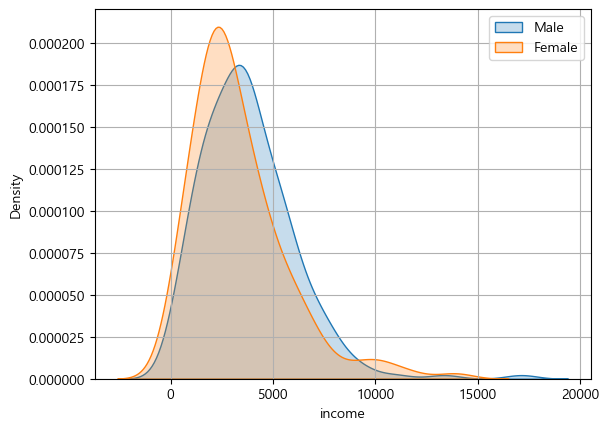

In [18]:
# sns의 kdeplot이용해보자
sns.kdeplot(df31['income'],shade=True,label='Male')
sns.kdeplot(df32['income'],shade=True,label='Female')
plt.legend()
plt.grid()
plt.show()

In [20]:
# 평균소득이 남자가 더 높다 = 더 오른쪽에 최고점
# 평균적으로 남자들이 더 돈 많이 번다
# 꼬리는 여자가 더 많음

In [21]:
# 두 그룹의 소득차이 귀무가설 검정하기
# 지금 히스토그램은 388명가지고 그린거임
# 난 전체에서 남녀간 소득차이 알고 싶음
# 두 그룹(남녀)의 소득차이의 유의성검정을 위해 z통계량을 구해보자

In [30]:
df3.head()

,sex,number,age,income
19,1,1,35,1089
134,2,1,30,3756
157,1,1,30,2004
190,1,1,36,5802
191,2,1,31,3032


In [22]:
df4=df3['income'].groupby(df3['sex'])
df4_1=df4.agg(['mean','std','count'])
df4_1

,mean,std,count
sex,,,
1,3756.971193,2285.066126,243
2,3309.848276,2354.872075,145


In [23]:
df4.head()

19     1089
134    3756
157    2004
190    5802
191    3032
262    4001
293    4080
338    9767
353    1009
355    2462
Name: income, dtype: int64

In [24]:
# 이거 df4 뭐지??? 강의 확인!!!!!!!!!!!!!!!!!!!!!!!!!!

In [25]:
# 분자 : z1 남자 소득 평균-여자 소득 평균
z1=3756.9-3309.8
z1

447.0999999999999

In [26]:
# 분모 = se
# se 표준오차 = 표본의 표준편차 / 루트 n
# 지금은 남자와 여자의 평균소득의 차이의 se를 계산해야함
se1=(2285**2)/243+(2354**2)/145
se2=np.sqrt(se1)
print(se2)

244.3409401789597


In [27]:
z=z1/se2
print(z)

1.829820249003445


In [28]:
# 파이썬코드로 (z) p-value 값 계산해ㅗㅂ자
p_value=1-norm.cdf(z)
print(p_value)

0.03363841094036557


In [29]:
# p-value 가 0.05보다 작기 때문에 귀무가설 기각
# 남자가 여자보다 소득이 크다!

In [31]:
# 파이썬으로 어케 한다는거임

In [32]:
# 카이제곱 분포의 이해
# 두 집단이 아닌 세, 네 집단 일 때
# 카이제곱의 자유도 = number of group -1

In [33]:
# ex. 카이제곱 분포 wth degree of freedom=5 = 6-1
chi=4.8
p_value=1-chi2.cdf(chi,5)
print(p_value)

0.4407729680866631


In [34]:
# p-value=44%
# 0.05, 5% 보다는 훨씬 크다. 귀무가설 기각하지 않는다
# 저 6집단간 차이가 실질적으로 없다.

In [37]:
# 모의실험(함수를 스스로 정의)으로 카이제곱 분포 구해보자

# 60번 주사위 던짐
import random # 무작위로 수 나오게..
def rolldie():
    one=0;two=0;three=0;four=0;five=0;six=0 # 0부터 시작해서 나오는 숫자 더해주기 위함
    for i in range(60):
        roll=random.choice([1,2,3,4,5,6]) # [] 안에 있는 것 중에 하나 꺼내는데, 복원추출
        if roll==1:
            one=one+1
        elif roll==2:
            two=two+1
        elif roll==3:
            three=three+1
        elif roll==4:
            four=four+1
        elif roll==5:
            five=five+1
        elif roll==6:
            six=six+1
    return [one,two,three,four,five,six]
rolldie()

[16, 7, 9, 7, 14, 7]

In [38]:
# 100번 던지는 결과는 우연으로 서로 차이가 발생했는지 가설검정하세요

import random 
def rolldie():
    one=0;two=0;three=0;four=0;five=0;six=0 # 0부터 시작해서 나오는 숫자 더해주기 위함
    for i in range(100):
        roll=random.choice([1,2,3,4,5,6]) # [] 안에 있는 것 중에 하나 꺼내는데, 복원추출
        if roll==1:
            one=one+1
        elif roll==2:
            two=two+1
        elif roll==3:
            three=three+1
        elif roll==4:
            four=four+1
        elif roll==5:
            five=five+1
        elif roll==6:
            six=six+1
    return [one,two,three,four,five,six]
rolldie()

[19, 18, 12, 17, 16, 18]

In [39]:
expected=100/6
chi_stat=(12-expected)**2+(16-expected)**2+(18-expected)**2+(18-expected)**2+(14-expected)**2+(22-expected)**2
print(chi_stat)

61.33333333333333


In [40]:
chi_stat1=157/expected
print(chi_stat1)

9.42


In [41]:
chi=9.42
p_value=1-chi2.cdf(chi,5)
print(p_value)

0.09343960224958658


In [42]:
# 0.05보다 크다
# 귀무가설 기각할 수 없다
# 차이는 우연에 의한 것이다